In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Select the correct columns for Annual Income and Spending Score from your dataset
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Visualize data points
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution by Income and Spending Score')
plt.show()

KeyError: "None of [Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')] are in the [columns]"

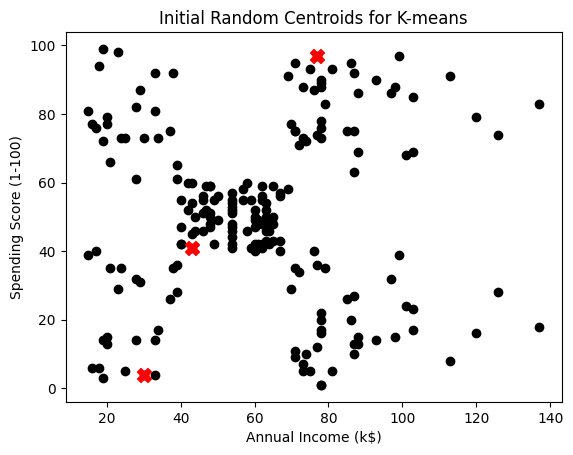

In [ ]:
K = 3

Centroids = X.sample(n=K)
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black')
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='red', s=100, marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Initial Random Centroids for K-means')
plt.show()

In [ ]:
diff = 1
j = 0

while(diff != 0):
    XD = X.copy()
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Annual Income (k$)"] - row_d["Annual Income (k$)"]) ** 2
            d2 = (row_c["Spending Score (1-100)"] - row_d["Spending Score (1-100)"]) ** 2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i = i + 1

    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Annual Income (k$)", "Spending Score (1-100)"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum() + (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Annual Income (k$)", "Spending Score (1-100)"]]

13.925897421953
12.545438906735235
9.083352741507777
5.5440723185061085
3.6716349127063452
4.363989835301307
1.2927042408407807
0.0


C:\Users\OM\AppData\Local\Temp\ipykernel_17052\2903853836.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
C:\Users\OM\AppData\Local\Temp\ipykernel_17052\2903853836.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED


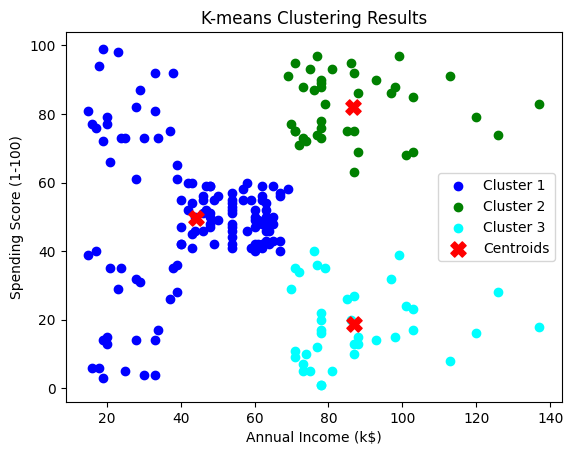

In [ ]:
colors = ['blue', 'green', 'cyan']
for k in range(K):
    data_k = X[X["Cluster"] == k+1]
    plt.scatter(data_k["Annual Income (k$)"], data_k["Spending Score (1-100)"], c=colors[k], label=f'Cluster {k+1}')
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='red', s=120, marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()